# Detectron2 Tutorial
## Using a Pretrained Model
In this tutorial, we will use Detectron2 from Facebook AI Research (FAIR) to import pretrained object detector models and test them on images from our dataset.

This tutorial allows you to switch between two different object detector model types:
* RetinaNet for bounding box based object detection
* Mask R-CNN for instance segmentation

These two model arhcitectures are commonly used in practice and both developed by FAIR, hence the out-of-the-box support.

In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Load a Pretrained Network

In [2]:
from detectron2 import model_zoo
from detectron2.config import get_cfg

# Select a model type and score threshold (0 to 1)
model_type = "maskrcnn"
score_thresh = 0.5

# Create a configuration
cfg = get_cfg()
if model_type == "maskrcnn":
    model_file = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh
if model_type == "retinanet":
    model_file = "COCO-Detection/retinanet_R_50_FPN_3x.yaml"
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = score_thresh
cfg.merge_from_file(model_zoo.get_config_file(model_file))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_file)  # Let training initialize from model zoo

# Create a predictor using the trained model    
from detectron2.engine import DefaultPredictor
predictor = DefaultPredictor(cfg)

## Evaluate Pretrained Model On Test Set
Show some qualitative results by predicting on test set images.

AttributeError: 'NoneType' object has no attribute 'shape'

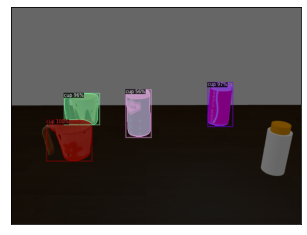

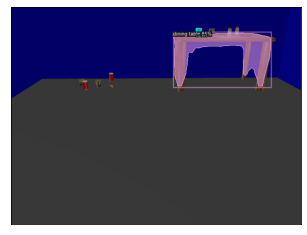

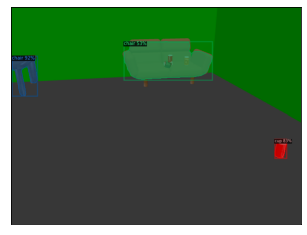

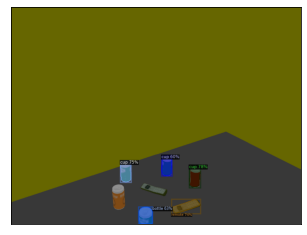

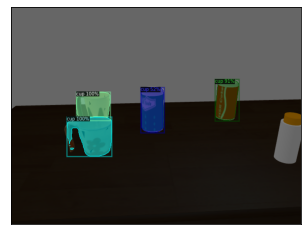

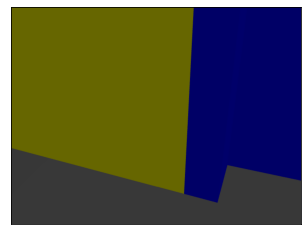

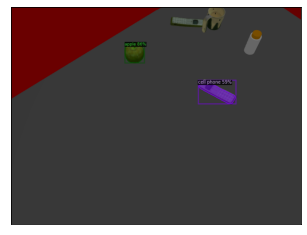

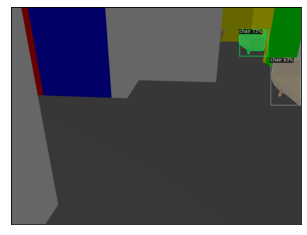

In [3]:
from detectron2.utils.visualizer import Visualizer

# Specify the image directory and number of sample images to display
img_dir = "/home/sebastian/Workspace/coco-annotator/datasets/hsr_sim_test"
NUM_TEST_SAMPLES = 10

test_imgs = os.listdir(img_dir)
samples = random.sample(test_imgs, NUM_TEST_SAMPLES)
for i, sample in enumerate(samples):
    img = cv2.imread(os.path.join(img_dir, sample))
    outputs = predictor(img)
    visualizer = Visualizer(img, metadata=predictor.metadata)
    visualizer = visualizer.draw_instance_predictions(
        outputs["instances"].to("cpu"))
    display_img = visualizer.get_image()[:, :, ::-1]
    plt.figure(i), plt.xticks([]), plt.yticks([])
    plt.imshow(display_img)